# Clustering Project - 10 

K means clustering

In [2]:

import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel("D:\EastWestAirlines.xlsx")
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
print(data.columns)

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [5]:
print(data.shape)

(3999, 12)


In [10]:
# Select the relevant columns for clustering
X = data[['Balance', 'Qual_miles', 'Bonus_miles','Award?', 'Bonus_trans', 'Flight_miles_12mo']]
X

,Balance,Qual_miles,Bonus_miles,Award?,Bonus_trans,Flight_miles_12mo
0,28143,0,174,0,1,0
1,19244,0,215,0,2,0
2,41354,0,4123,0,4,0
3,14776,0,500,0,1,0
4,97752,0,43300,1,26,2077
...,...,...,...,...,...,...
3994,18476,0,8525,1,4,200
3995,64385,0,981,1,5,0
3996,73597,0,25447,1,8,0
3997,54899,0,500,0,1,500


In [14]:
km = KMeans(n_clusters=4)
print(km)

KMeans(n_clusters=4)


In [11]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

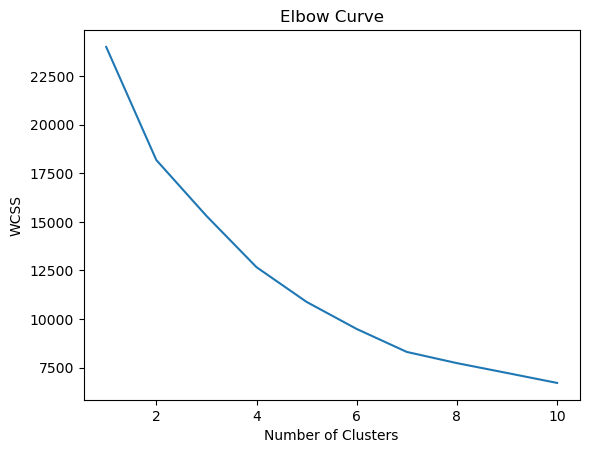

In [13]:
# Plot the elbow curve to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Based on the elbow curve, choose the optimal number of clusters
num_clusters = 4

In [16]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [17]:
# Assign clusters to the data points
data['Cluster'] = kmeans.labels_

In [18]:
# Print the characteristics of each cluster
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f'Cluster {cluster+1}:')
    print('Mean Values:')
    print(cluster_data.mean())
    print('==================================')

Cluster 1:
Mean Values:
ID#                   1830.838793
Balance              60288.646552
Qual_miles              84.068966
cc1_miles                2.412931
cc2_miles                1.013793
cc3_miles                1.000000
Bonus_miles          20148.839655
Bonus_trans             12.873276
Flight_miles_12mo      381.891379
Flight_trans_12          1.231897
Days_since_enroll     4467.361207
Award?                   1.000000
Cluster                  0.000000
dtype: float64
Cluster 2:
Mean Values:
ID#                   2191.603009
Balance              52403.748433
Qual_miles              30.933138
cc1_miles                1.610531
cc2_miles                1.014626
cc3_miles                1.003761
Bonus_miles           8537.260761
Bonus_trans              8.493523
Flight_miles_12mo      176.617635
Flight_trans_12          0.545341
Days_since_enroll     3788.067280
Award?                   0.000000
Cluster                  1.000000
dtype: float64
Cluster 3:
Mean Values:
ID#           

In [20]:
# Output the clustered data to a new file
data.to_csv('D:\ClusteredAirlines.csv', index=False)